# Задача №6

Для l1+l2 регуляризации визуализировать зависимость функции потерь на контроле и обучении от значений коэффициентов регуляризации. Координаты: коэффициенты перед l1-регуляризацией, l2-регуляризацией, потеря на обучении. Цвет поверхности - потеря на контроле. Выборка: одна из стандартных датасетов sklearn. Модель: линейная или логистическая регрессия.

Импортируем нужные библиотеки

In [70]:
import tqdm
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

Загружаем датасет

In [71]:
X, y = load_breast_cancer(return_X_y=True)

Делаем разбиение на обучение и тестирование

In [3]:
X_train_, X_test_, y_train, y_test = train_test_split(X, y)

Нормализуем данные

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)

In [73]:
train_losses = []
test_losses = []
l1s_ = np.logspace(-3, 2)
l2s_ = np.logspace(-3, 2)
for l1 in tqdm.tqdm(l1s_):
    for l2 in l2s_:
        C = l1+l2
        ratio = l1 / C
        lm = LogisticRegression(C=C, penalty='elasticnet', l1_ratio=ratio, solver='saga', n_jobs=-1, max_iter=10000)
        lm.fit(X_train, y_train)

        train_loss = log_loss(y_train, lm.predict_proba(X_train))
        test_loss = log_loss(y_test, lm.predict_proba(X_test))

        train_losses.append(train_loss)
        test_losses.append(test_loss)

100%|██████████| 50/50 [22:14<00:00, 26.69s/it]


In [85]:
l2s, l1s = np.meshgrid(1 / l2s_, 1 / l1s_)

In [86]:
Z_train = np.array(train_losses).reshape(-1, 50)
Z_test = np.array(test_losses).reshape(-1, 50)

Визуализируем результаты

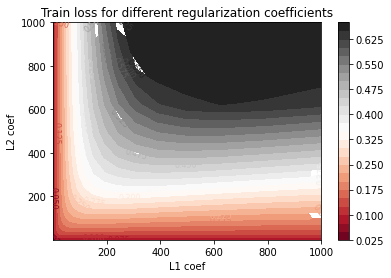

In [87]:
contours = plt.contourf(l1s, l2s,  Z_train, 30, cmap='RdGy')
plt.clabel(contours, inline=True, fontsize=8)

plt.xlabel('L1 coef')
plt.ylabel('L2 coef')
plt.title("Train loss for different regularization coefficients")
plt.colorbar()

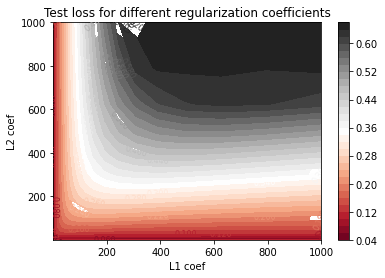

In [88]:
contours = plt.contourf(l1s, l2s,  Z_test, 30, cmap='RdGy')
plt.clabel(contours, inline=True, fontsize=8)

plt.xlabel('L1 coef')
plt.ylabel('L2 coef')
plt.title("Test loss for different regularization coefficients")
plt.colorbar()

В этом случае оказалась наиболее эффективная l2 регуляризация